Import Lib and Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

In [2]:
data =pd.read_csv('BTCUSDT_5m_20260205_20260206.csv')

In [3]:
df =pd.read_csv('BTCUSDT_5m_20260205_20260206.csv')

In [4]:
df['OpenTime'] = pd.to_datetime(df['OpenTime'])

 Create new column 'Datetime' from 'OpenTime'

In [5]:
df = pd.DataFrame(data)

df['Datetime'] = pd.to_datetime(df['OpenTime'])

# Optional: make it index
df.set_index('Datetime', inplace=True)



1H candles

In [6]:
df_1H = df.resample('1H').agg({
    'Open': 'first',   #  first open
    'High': 'max',     # highest price
    'Low': 'min',      # lowest price
    'Close': 'last',   # last close
    'Volume': 'sum'    # total volume
})

print("1H candles:")
print(df_1H.head())


1H candles:
                         Open      High       Low     Close      Volume
Datetime                                                               
2026-02-05 00:00:00  73425.97  74007.28  73041.41  73923.29  1609.77508
2026-02-05 01:00:00  73923.30  74144.00  73425.56  73516.30  1052.61663
2026-02-05 02:00:00  73516.30  73654.00  72210.00  72799.99  1379.23839
2026-02-05 03:00:00  72800.00  73680.00  71888.00  72543.38  2426.62344
2026-02-05 04:00:00  72543.38  73520.59  72468.12  73165.83  1296.31791


C:\Users\92msm\AppData\Local\Temp\ipykernel_7512\30926977.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_1H = df.resample('1H').agg({


4H candles

In [7]:
df_4H = df.resample('4H').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
})

print("4H candles:")
print(df_4H.head())


4H candles:
                         Open      High       Low     Close       Volume
Datetime                                                                
2026-02-05 00:00:00  73425.97  74144.00  71888.00  72543.38   6468.25354
2026-02-05 04:00:00  72543.38  73520.59  71305.55  71454.44   7103.89407
2026-02-05 08:00:00  71454.44  71884.47  70140.00  70951.51  13165.46080
2026-02-05 12:00:00  70951.51  71978.58  70644.73  70858.13   7888.05367
2026-02-05 16:00:00  70858.13  71063.94  69163.00  69404.76  15485.37436


C:\Users\92msm\AppData\Local\Temp\ipykernel_7512\3575331824.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_4H = df.resample('4H').agg({


Previous Day H -L

In [8]:
def calc_prev_day_levels(df, timeframe, date_str):
    """
    df        : resampled DataFrame (1H, 4H, etc.)
    timeframe : string, e.g., '1H' or '4H' (for print)
    date_str  : previous day date in "YYYY-MM-DD"
    """
    prev_day = df[df.index.date == pd.to_datetime(date_str).date()]
    prev_day_high = prev_day['High'].max()
    prev_day_low = prev_day['Low'].min()
    prev_day_close = prev_day['Close'].iloc[-1]
    
    print(f"\nPrevious Day Levels ({timeframe}):")
    print("High:", prev_day_high)
    print("Low :", prev_day_low)
    print("Close:", prev_day_close)
    
    return prev_day_high, prev_day_low, prev_day_close

# Usage for 1H
calc_prev_day_levels(df_1H, '1H', '2026-02-05')

# Usage for 4H
calc_prev_day_levels(df_4H, '4H', '2026-02-05')



Previous Day Levels (1H):
High: 74144.0
Low : 65385.0
Close: 66347.0

Previous Day Levels (4H):
High: 74144.0
Low : 65385.0
Close: 66347.0


(np.float64(74144.0), np.float64(65385.0), np.float64(66347.0))

In [9]:
#  for 1H
prev_day_1H = df_1H[df_1H.index.date == pd.to_datetime("2026-02-05").date()]
prev_high = prev_day_1H['High'].max()
prev_low = prev_day_1H['Low'].min()
prev_close = prev_day_1H['Close'].iloc[-1]

prev_day_levels = calc_prev_day_levels(df_1H, '1H', '2026-02-05')
print(prev_day_levels)



Previous Day Levels (1H):
High: 74144.0
Low : 65385.0
Close: 66347.0
(np.float64(74144.0), np.float64(65385.0), np.float64(66347.0))


sessions Levels

In [10]:
 #Define sessions in UTC
sessions = {
    "Asian": ("00:00", "08:00"),
    "London": ("08:00", "16:00"),
    "NewYork": ("13:00", "21:00")
}

calculate session High/Low

In [11]:
def calculate_session_levels(df, sessions):
    session_levels = {}
    
    for name, (start, end) in sessions.items():
        mask = (df.index.time >= pd.to_datetime(start).time()) & \
               (df.index.time < pd.to_datetime(end).time())
        session_df = df[mask]
        
        if not session_df.empty:
            high = session_df['High'].max()
            low = session_df['Low'].min()
            session_levels[name] = {"High": high, "Low": low}
    
    return session_levels


In [12]:
levels = calculate_session_levels(df, sessions)

for session, lv in levels.items():
    print(f"{session} Session -> High: {lv['High']}, Low: {lv['Low']}")


Asian Session -> High: 74144.0, Low: 66036.92
London Session -> High: 71978.58, Low: 70140.0
NewYork Session -> High: 71978.58, Low: 66720.15


In [13]:
session_levels = calculate_session_levels(df, sessions)
print(session_levels)


{'Asian': {'High': np.float64(74144.0), 'Low': np.float64(66036.92)}, 'London': {'High': np.float64(71978.58), 'Low': np.float64(70140.0)}, 'NewYork': {'High': np.float64(71978.58), 'Low': np.float64(66720.15)}}


Trend checking

Today's Trend (1H): Range / Sideways


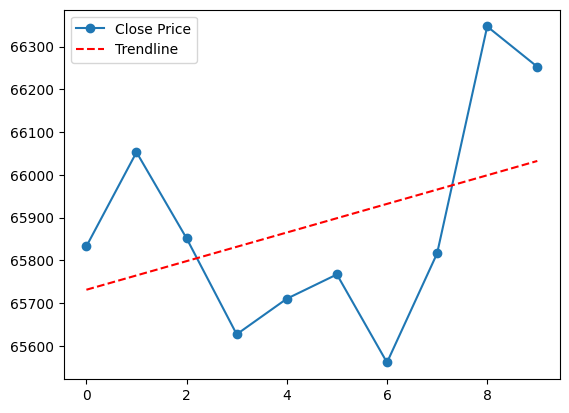

In [14]:

today_close = df_1H['Close'].iloc[-1] 

if today_close > prev_high:
    trend = "Uptrend"
elif today_close < prev_low:
    trend = "Downtrend"
else:
    trend = "Range / Sideways"

print("Today's Trend (1H):", trend)

import numpy as np

# Example: last N closes
closes = df['Close'][-10:]  # last 10 candles
x = np.arange(len(closes))

# Fit linear trendline
slope, intercept = np.polyfit(x, closes, 1)
trendline = slope * x + intercept

# Plot
plt.plot(x, closes, marker='o', label='Close Price')
plt.plot(x, trendline, color='red', linestyle='--', label='Trendline')
plt.legend()
plt.show()


5m candles, EMA20 & EMA50

In [15]:
df = pd.DataFrame(data)

# 20 EMA
df['EMA20'] = df['Close'].ewm(span=20, adjust=False).mean()

# 50 EMA
df['EMA50'] = df['Close'].ewm(span=50, adjust=False).mean()



In [16]:
df_1H['EMA20'] = df_1H['Close'].ewm(span=20, adjust=False).mean()
df_1H['EMA50'] = df_1H['Close'].ewm(span=50, adjust=False).mean()
df.head()

,OpenTime,Open,High,Low,Close,Volume,EMA20,EMA50
0,2026-02-05 00:00,73425.97,73925.00,73391.74,73801.55,133.78253,73801.550000,73801.550000
1,2026-02-05 00:05,73801.48,73801.48,73532.63,73656.01,91.06291,73787.689048,73795.842549
2,2026-02-05 00:10,73656.01,73769.45,73506.64,73532.36,99.07267,73763.371995,73785.509900
3,2026-02-05 00:15,73532.35,73771.31,73500.63,73525.15,158.90000,73740.684186,73775.299708
4,2026-02-05 00:20,73525.15,73564.50,73084.36,73264.01,147.92719,73695.286645,73755.249131


EMA Reaction

In [17]:
def ema_reaction(df, ema_col='EMA20'):
    last = df.iloc[-1]
    prev = df.iloc[-2]

    # EMA Support
    if (
        prev['Low'] <= prev[ema_col] and
        last['Close'] > last[ema_col] and
        last['Close'] > prev['Close']
    ):
        return f"Bullish rejection from {ema_col} (Support)"

    # EMA Resistance
    if (
        prev['High'] >= prev[ema_col] and
        last['Close'] < last[ema_col] and
        last['Close'] < prev['Close']
    ):
        return f"Bearish rejection from {ema_col} (Resistance)"

    return f"No clear reaction at {ema_col}"


In [18]:
print("5m EMA20:", ema_reaction(df, 'EMA20'))
print("5m EMA50:", ema_reaction(df, 'EMA50'))


5m EMA20: Bearish rejection from EMA20 (Resistance)
5m EMA50: No clear reaction at EMA50


Strong Reaction (EMA20 + EMA50 Confluence)

In [19]:
def ema_confluence_reaction(df):
    last = df.iloc[-1]

    if last['Close'] > last['EMA20'] > last['EMA50']:
        return "Strong Bullish (Price above EMA20 & EMA50)"

    if last['Close'] < last['EMA20'] < last['EMA50']:
        return "Strong Bearish (Price below EMA20 & EMA50)"

    if last['EMA20'] > last['EMA50']:
        return "Bullish structure, pullback phase"

    if last['EMA20'] < last['EMA50']:
        return "Bearish structure, pullback phase"

    return "Neutral"


In [20]:
print("EMA Structure:", ema_confluence_reaction(df))


EMA Structure: Strong Bearish (Price below EMA20 & EMA50)


EMA Break & Retest Logic (High-Probability Setup)

In [21]:
def ema_break_retest(df, ema='EMA20'):
    last = df.iloc[-1]
    prev = df.iloc[-2]

    # Break above EMA
    if prev['Close'] < prev[ema] and last['Close'] > last[ema]:
        return f"Break above {ema} (Potential bullish shift)"

    # Break below EMA
    if prev['Close'] > prev[ema] and last['Close'] < last[ema]:
        return f"Break below {ema} (Potential bearish shift)"

    return "No EMA break"


In [22]:
print("EMA20 Break:", ema_break_retest(df, 'EMA20'))


EMA20 Break: Break below EMA20 (Potential bearish shift)


Multi-Timeframe EMA Reaction (PRO LEVEL)

In [23]:
def mtf_ema_bias(df_5m, df_1h):
    bias = {}

    bias['5m'] = ema_confluence_reaction(df_5m)
    bias['1H'] = ema_confluence_reaction(df_1h)

    if "Bullish" in bias['5m'] and "Bullish" in bias['1H']:
        return "✅ STRONG BULLISH BIAS"

    if "Bearish" in bias['5m'] and "Bearish" in bias['1H']:
        return "❌ STRONG BEARISH BIAS"

    return "⚠ Mixed / Wait"


In [24]:
print("MTF EMA Bias:", mtf_ema_bias(df, df_1H))


MTF EMA Bias: ❌ STRONG BEARISH BIAS


EMA + Previous Day High / Low (PDH / PDL)
Bullish Logic

Price > EMA20 & EMA50

Previous Day High ke upar break ya retest

EMA = support

📉 Bearish Logic

Price < EMA20 & EMA50

Previous Day Low ke neeche

In [25]:
def ema_prevday_confluence(df, prev_high, prev_low):
    last = df.iloc[-1]

    if last['Close'] > last['EMA20'] > last['EMA50'] and last['Close'] > prev_high:
        return "Bullish: EMA support + PDH breakout"

    if last['Close'] < last['EMA20'] < last['EMA50'] and last['Close'] < prev_low:
        return "Bearish: EMA resistance + PDL breakdown"

    return "No clear EMA + Previous Day confluence"


In [26]:
print(ema_prevday_confluence(df, prev_high, prev_low))


No clear EMA + Previous Day confluence


In [27]:
def ema_session_confluence(df, session_levels):
    last = df.iloc[-1]

    for session, lv in session_levels.items():
        if last['Close'] > last['EMA20'] and last['Close'] > lv['High']:
            return f"Bullish: EMA support + {session} High break"

        if last['Close'] < last['EMA20'] and last['Close'] < lv['Low']:
            return f"Bearish: EMA resistance + {session} Low break"

    return "No EMA + Session confluence"


In [28]:
print(ema_session_confluence(df, session_levels))


Bearish: EMA resistance + London Low break


EMA + Trendline Confluence (Structure)

In [29]:
def ema_trendline_confluence(df, lookback=20):
    closes = df['Close'].tail(lookback)
    x = np.arange(len(closes))

    slope, _ = np.polyfit(x, closes, 1)
    last = df.iloc[-1]

    if slope > 0 and last['Close'] > last['EMA20']:
        return "Bullish: Uptrend + EMA support"

    if slope < 0 and last['Close'] < last['EMA20']:
        return "Bearish: Downtrend + EMA resistance"

    return "No EMA + Trendline confluence"


In [30]:
print(ema_trendline_confluence(df))


Bearish: Downtrend + EMA resistance


EMA-based Entry / SL / TP (REAL TRADING LOGIC)
Entry Rules (5m example)
Bullish Entry

Trend = Bullish (1H EMA)

Price pulls back to EMA20

Rejection candle

📉 Bearish Entry

Trend = Bearish

Pullback to EMA20

Rejection down

In [31]:
def ema_trade_setup(df, rr=2):
    last = df.iloc[-1]
    prev = df.iloc[-2]

    # Bullish entry
    if (
        prev['Low'] <= prev['EMA20'] and
        last['Close'] > last['EMA20']
    ):
        entry = last['Close']
        sl = prev['Low']
        tp = entry + (entry - sl) * rr

        return {
            "Bias": "Bullish",
            "Entry": round(entry, 2),
            "SL": round(sl, 2),
            "TP": round(tp, 2)
        }

    # Bearish entry
    if (
        prev['High'] >= prev['EMA20'] and
        last['Close'] < last['EMA20']
    ):
        entry = last['Close']
        sl = prev['High']
        tp = entry - (sl - entry) * rr

        return {
            "Bias": "Bearish",
            "Entry": round(entry, 2),
            "SL": round(sl, 2),
            "TP": round(tp, 2)
        }

    return "No valid EMA trade setup"


In [32]:
print(ema_trade_setup(df))


{'Bias': 'Bearish', 'Entry': np.float64(66252.72), 'SL': np.float64(66477.3), 'TP': np.float64(65803.56)}


FINAL CONFLUENCE SCORE (PRO MOVE)

In [33]:
prev_high_1H, prev_low_1H, prev_close_1H = calc_prev_day_levels(
    df_1H, '1H', '2026-02-05'
)



Previous Day Levels (1H):
High: 74144.0
Low : 65385.0
Close: 66347.0


In [34]:
def confluence_score(*signals):
    score = sum(1 for s in signals if "Bullish" in str(s) or "Bearish" in str(s))
    return f"Confluence Score: {score}/4"


In [35]:
print(confluence_score(
    ema_prevday_confluence(df, prev_high_1H, prev_low_1H),
    ema_session_confluence(df, session_levels),
    ema_trendline_confluence(df),
    ema_trade_setup(df)
))


Confluence Score: 3/4


EMA + Liquidity Sweep

In [36]:
def ema_liquidity_sweep(df, prev_high, prev_low):
    last = df.iloc[-1]

    # Bullish sweep
    if (
        last['Low'] < prev_low and
        last['Close'] > last['EMA20']
    ):
        return "Bullish Liquidity Sweep + EMA reclaim"

    # Bearish sweep
    if (
        last['High'] > prev_high and
        last['Close'] < last['EMA20']
    ):
        return "Bearish Liquidity Sweep + EMA reject"

    return "No liquidity sweep"


In [37]:
print(ema_liquidity_sweep(df, prev_high_1H, prev_low_1H))


No liquidity sweep


EMA + Fair Value Gap (FVG)

In [38]:
def detect_fvg(df):
    if len(df) < 3:
        return None

    c1 = df.iloc[-3]
    c2 = df.iloc[-2]
    c3 = df.iloc[-1]

    # Bullish FVG
    if c1['High'] < c3['Low']:
        return ("Bullish FVG", c1['High'], c3['Low'])

    # Bearish FVG
    if c1['Low'] > c3['High']:
        return ("Bearish FVG", c3['High'], c1['Low'])

    return None


EMA + FVG Confluence

In [39]:
def ema_fvg_confluence(df):
    fvg = detect_fvg(df)
    last = df.iloc[-1]

    if fvg:
        direction, low, high = fvg

        if direction == "Bullish FVG" and last['Close'] > last['EMA20']:
            return f"Bullish EMA + FVG ({low:.2f}–{high:.2f})"

        if direction == "Bearish FVG" and last['Close'] < last['EMA20']:
            return f"Bearish EMA + FVG ({low:.2f}–{high:.2f})"

    return "No EMA + FVG confluence"


In [40]:
print(ema_fvg_confluence(df))


No EMA + FVG confluence


Ploting

In [41]:
plot_slice = df.tail(100).copy()

# Ensure index is DatetimeIndex
if not isinstance(plot_slice.index, pd.DatetimeIndex):
    if 'Datetime' in plot_slice.columns:
        plot_slice.set_index('Datetime', inplace=True)
    elif 'OpenTime' in plot_slice.columns:
        plot_slice['Datetime'] = pd.to_datetime(plot_slice['OpenTime'])
        plot_slice.set_index('Datetime', inplace=True)
    else:
        raise KeyError("No 'Datetime' or 'OpenTime' column found to set as index.")


In [42]:
# Filter horizontal lines
h_lines = [lvl for lvl in [prev_high_1H, prev_low_1H, prev_close_1H] if lvl is not None]
for lv in session_levels.values():
    if lv['High'] is not None:
        h_lines.append(lv['High'])
    if lv['Low'] is not None:
        h_lines.append(lv['Low'])

# Only add buy/sell markers if they exist
apds = [
    mpf.make_addplot(plot_slice['EMA20'], color='blue'),
    mpf.make_addplot(plot_slice['EMA50'], color='orange')
]

trade = ema_trade_setup(df)
if isinstance(trade, dict):
    buy_marker = pd.Series(np.nan, index=plot_slice.index)
    sell_marker = pd.Series(np.nan, index=plot_slice.index)
    if trade["Bias"] == "Bullish":
        buy_marker.iloc[-1] = trade["Entry"]
        apds.append(mpf.make_addplot(buy_marker, type='scatter', markersize=150, marker='^', color='green'))
    elif trade["Bias"] == "Bearish":
        sell_marker.iloc[-1] = trade["Entry"]
        apds.append(mpf.make_addplot(sell_marker, type='scatter', markersize=150, marker='v', color='red'))


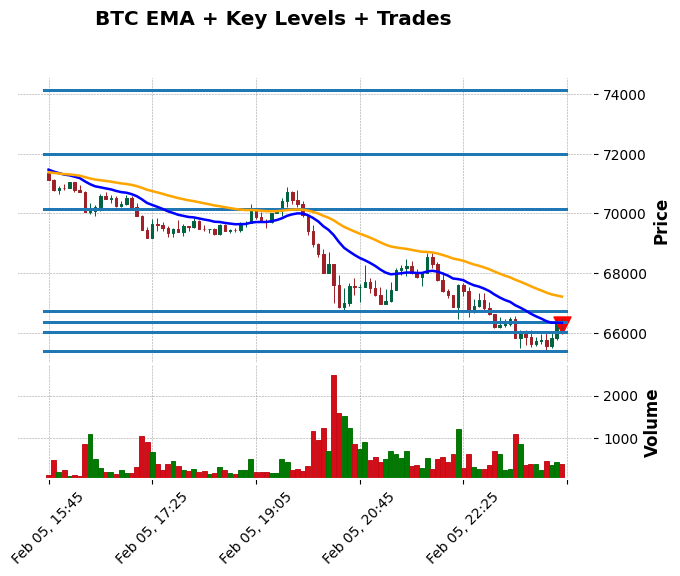

In [43]:
mpf.plot(
    plot_slice,
    type='candle',
    style='charles',
    addplot=apds,
    hlines=h_lines if h_lines else None,  # only pass if not empty
    title="BTC EMA + Key Levels + Trades",
    volume=True
)
